# import
---------------------------------------

In this section, you can learn how to import network data from various type of file format, for example local file, URLs, web services, and your creating data.

## Supported format
---------------------------------------

In py2cytoscape, there are some supported formats that you can import.

- Cytoscape.js
- NetworkX
- Pandas DataFrame
- igraph
- Numpy adjacency matrix (binary or weighted)

## Table of contents
---------------------------------------

In this section, we load data from various type of format and data type. In addition to supported formats that we  menthion above, we will import some python's data format data and update network table.

- Create empty network
- Load networks from files, URLs or web service
- Create networks from various types of data
- Update Table

# Create empty network
---------------------------------------

First, you learn how to create empty network.

In [2]:
# import
from py2cytoscape.data.cyrest_client import CyRestClient

# Create REST client for Cytoscape
cy = CyRestClient()

# Reset current session for fresh start
cy.session.delete()

# Empty network
empty1 = cy.network.create()

# With name
empty2 = cy.network.create(name='Created in Jupyter Notebook')

# With name and collection name
empty3 = cy.network.create(name='Also created in Jupyter', collection='New network collection')

# Load networks from files, URLs or web services
---------------------------------------

To load network data from files, URLs or web services is your usual task. By using following code, you can import data from such kind of data format.



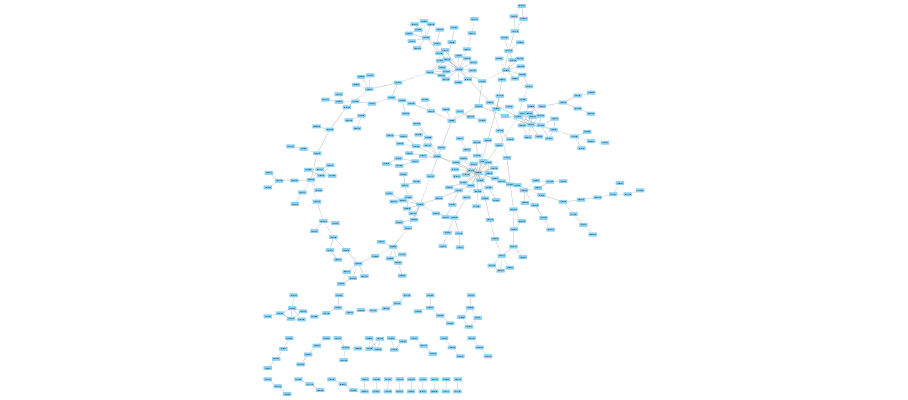

In [3]:
# import data from url
from py2cytoscape.data.cyrest_client import CyRestClient
import pandas as pd
from IPython.display import Image

# Create REST client for Cytoscape
cy = CyRestClient()

# Reset current session for fresh start
cy.session.delete()

# Load a sample network
network1 = cy.network.create_from('http://chianti.ucsd.edu/~kono/data/galFiltered.sif')

# Load a single local file
network2 = cy.network.create_from('../sampleData/galFiltered.json')
network3 = cy.network.create_from('../sampleData/sample_yeast_network.xgmml', collection='My Collection')
network4 = cy.network.create_from('../sampleData/galFiltered.gml', collection='My Collection')

# Load from multiple locations
network_locations = [
    # Static file on a web server
    'http://chianti.ucsd.edu/cytoscape-data/galFiltered.sif', 
    # or a web service
    'http://www.ebi.ac.uk/Tools/webservices/psicquic/intact/webservices/current/search/query/brca1?format=xml25' 
]

# This requrns Series
networks = cy.network.create_from(network_locations)
pd.DataFrame(networks, columns=['CyNetwork'])

# Apply layout to the cytoscape network object
cy.layout.apply(network = network1)

# Show it!!
Image(network1.get_png(height=400))

# Create networks from various types of data
---------------------------------------

Currently, py2cytoscape accepts the following data as input:
- Cytoscape.js
- NetworkX
- Pandas DataFrame
- igraph
- Numpy adjacency matrix (binary or weighted)

In the followin sections, you can look some examples of how to import various kinds of data type.


## From Cytoscape.js JSON
---------------------------------------

In [45]:
# import 
from py2cytoscape.data.cyrest_client import CyRestClient
import py2cytoscape.util.cytoscapejs as cyjs
from IPython.display import Image

# Create REST client for Cytoscape
cy = CyRestClient()

# Reset current session for fresh start
cy.session.delete()

# Cytoscape.js JSON
n1 = cy.network.create(data=cyjs.get_empty_network(), name='Created from Cytoscape.js JSON')


## From NetworkX
---------------------------------------

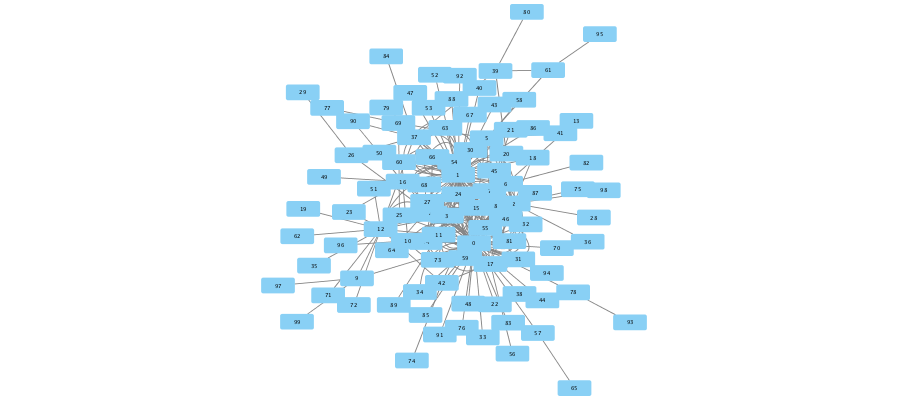

In [84]:
# import 
from py2cytoscape.data.cyrest_client import CyRestClient
import networkx as nx
from IPython.display import Image

# Create REST client for Cytoscape
cy = CyRestClient()

# Reset current session for fresh start
cy.session.delete()

# Create NetworkX data object
nx_graph  = nx.scale_free_graph(100)

# Generate cytoscape network object from networkx
scale_free100 = cy.network.create_from_networkx(nx_graph, collection='Generated by NetworkX')

# Apply layout to the cytoscape network object
cy.layout.apply(network = scale_free100)

# Show it!!
Image(scale_free100.get_png(height=400))

## From Pandas DataFrame
---------------------------------------

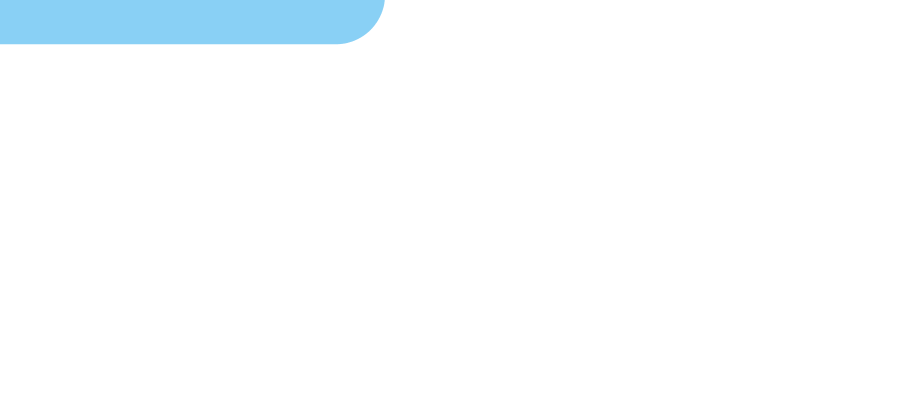

In [3]:
# import
from py2cytoscape.data.cyrest_client import CyRestClient
import pandas as pd
from IPython.display import Image

# Create REST client for Cytoscape
cy = CyRestClient()

# Reset current session for fresh start
cy.session.delete()

# Import Pandas DataFrame from a simple text table
df_from_sif = pd.read_csv('../sampleData/galFiltered.sif', names=['source', 'interaction', 'target'], sep=' ')

# Get the network object
network1 = cy.network.create_from_dataframe(df_from_sif)

# Apply layout 
cy.layout.apply(network = network1)

# Show it!!
Image(network1.get_png(height=400))

## igraph
---------------------------------------

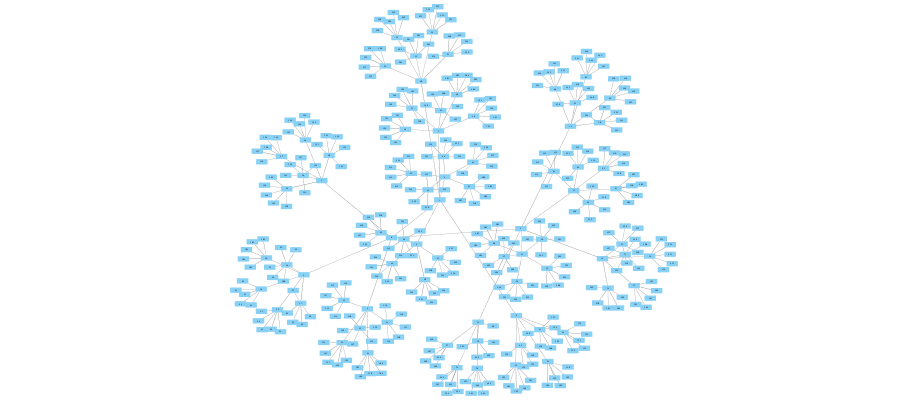

In [35]:
# import
from py2cytoscape.data.cyrest_client import CyRestClient
import igraph as ig
from IPython.display import Image

# Create REST client for Cytoscape
cy = CyRestClient()

# Reset current session for fresh start
cy.session.delete()

# igraph
ig_data = ig.Graph.Tree(400, 5)

# Get the network object from igraph data
network_igraph = cy.network.create_from_igraph(ig_data)

# Apply layout to network
cy.layout.apply(network = network_igraph)

# Show it!!
Image(network_igraph.get_png(height=400))

## Numpy adjacency matrix (binary or weighted)
---------------------------------------

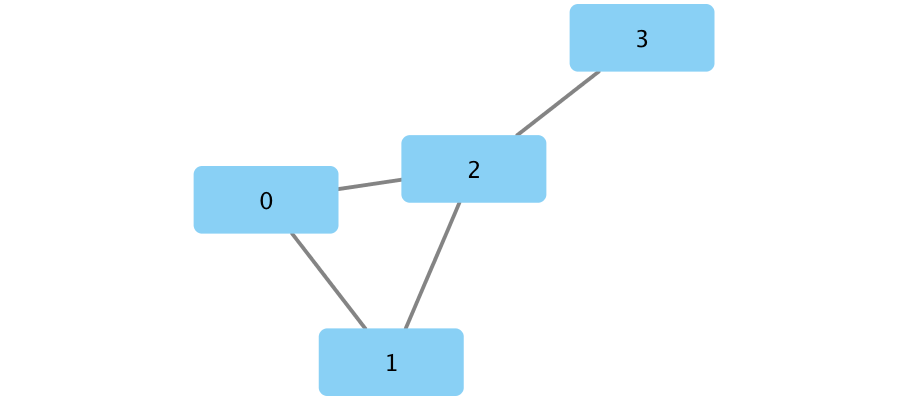

In [29]:
# Import
from py2cytoscape.data.cyrest_client import CyRestClient
import numpy as np
from IPython.display import Image

# Create REST client for Cytoscape
cy = CyRestClient()

# Reset current session for fresh start
cy.session.delete()

# Prepare ndarray data
matrix1 = np.array([
    [0, 1, 1, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 0]
])

# Generate cytoscape network obejct from ndarray
net1 = cy.network.create_from_ndarray(matrix1, name='binary sample')

# Apply layout
cy.layout.apply(network=net1)
cy.layout.fit(network=net1)

# Show it!!
Image(net1.get_png(height=400))

# Update Table

Let's do something a bit more realistic. You can update any Tables by using DataFrame objects.

In this example, We wull use ID Conversion web service by Uniprot to add more information to existing yeast network in current session.

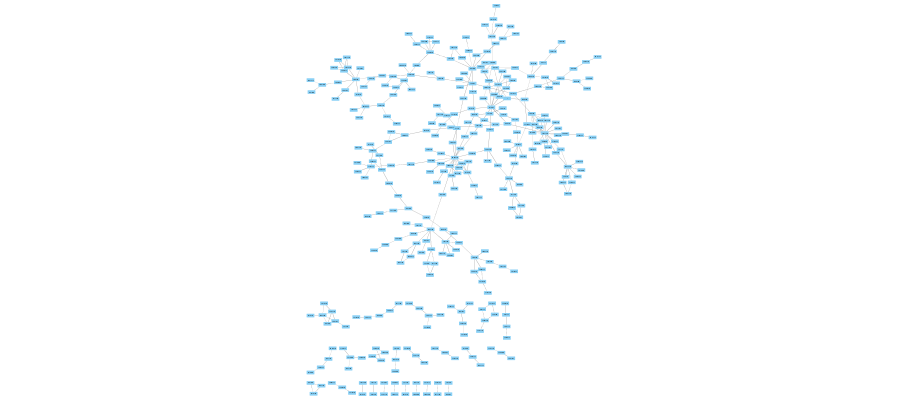

In [15]:
# Small utility function to convert ID sets
from py2cytoscape.data.cyrest_client import CyRestClient
from util.util_uniprot import *
import pandas as pd

# Create REST client for Cytoscape
cy = CyRestClient()

# Reset current session for fresh start
cy.session.delete()

# Load data from a simple text table as pandas data format
df_from_sif = pd.read_csv('../sampleData/galFiltered.sif', names=['source', 'interaction', 'target'], sep=' ')

# Create network from pandas data frame
network = cy.network.create_from_dataframe(df_from_sif, name='Yeast network created from pandas DataFrame')

# Apply layout
cy.layout.apply(network=network)

#Fit an existing network view to current window.
cy.layout.fit(network=network)

# Show it!!
Image(network.get_png(height=400))

In [22]:
# Get node table from Cytoscape
network_node_table = network.get_node_table()

# Show it
network_node_table.head()

,shared name,name,selected,id
SUID,,,,
71566,YKR026C,YKR026C,False,YKR026C
71567,YGL122C,YGL122C,False,YGL122C
71568,YGR218W,YGR218W,False,YGR218W
71569,YGL097W,YGL097W,False,YGL097W
71570,YOR204W,YOR204W,False,YOR204W


In [18]:
# From KEGG ID to UniprotKB ID
query1 = ' '.join(network_node_table['name'].map(lambda gene_id: 'sce:' + gene_id).values)
id_map_kegg2uniprot = uniprot_id_mapping_service(query1, from_id='KEGG_ID', to_id='ID')
id_map_kegg2uniprot.columns = ['kegg', 'uniprot']

# Show it
id_map_kegg2uniprot.head()

,kegg,uniprot
0,sce:YKR026C,EI2BA_YEAST
1,sce:YGL122C,NAB2_YEAST
2,sce:YGR218W,XPO1_YEAST
3,sce:YGL097W,RCC1_YEAST
4,sce:YOR204W,DED1_YEAST


In [19]:
# From UniprotKB to SGD
query2 = ' '.join(id_map_kegg2uniprot['uniprot'].values)
id_map_uniprot2sgd = uniprot_id_mapping_service(query2, from_id='ID', to_id='SGD_ID')
id_map_uniprot2sgd.columns = ['uniprot', 'sgd']

# Show it
id_map_uniprot2sgd.head()

,uniprot,sgd
0,EI2BA_YEAST,S000001734
1,NAB2_YEAST,S000003090
2,XPO1_YEAST,S000003450
3,RCC1_YEAST,S000003065
4,DED1_YEAST,S000005730


In [20]:
# From UniprotKB to Entrez Gene ID
query3 = ' '.join(id_map_kegg2uniprot['uniprot'].values)
id_map_uniprot2ncbi = uniprot_id_mapping_service(query3, from_id='ID', to_id='P_ENTREZGENEID')
id_map_uniprot2ncbi.columns = ['uniprot', 'entrez']

# Show it
id_map_uniprot2ncbi.head()

,uniprot,entrez
0,EI2BA_YEAST,853896
1,NAB2_YEAST,852755
2,XPO1_YEAST,853133
3,RCC1_YEAST,852782
4,DED1_YEAST,854379


In [21]:
# Merge them
merged = pd.merge(id_map_kegg2uniprot, id_map_uniprot2sgd, on='uniprot')
merged = pd.merge(merged, id_map_uniprot2ncbi, on='uniprot')

# Show it
merged.head()

,kegg,uniprot,sgd,entrez
0,sce:YKR026C,EI2BA_YEAST,S000001734,853896
1,sce:YGL122C,NAB2_YEAST,S000003090,852755
2,sce:YGR218W,XPO1_YEAST,S000003450,853133
3,sce:YGL097W,RCC1_YEAST,S000003065,852782
4,sce:YOR204W,DED1_YEAST,S000005730,854379


In [23]:
# Add key column by removing prefix
merged['name'] = merged['kegg'].map(lambda kegg_id : kegg_id[4:])

# Show it
merged.head()

,kegg,uniprot,sgd,entrez,name
0,sce:YKR026C,EI2BA_YEAST,S000001734,853896,YKR026C
1,sce:YGL122C,NAB2_YEAST,S000003090,852755,YGL122C
2,sce:YGR218W,XPO1_YEAST,S000003450,853133,YGR218W
3,sce:YGL097W,RCC1_YEAST,S000003065,852782,YGL097W
4,sce:YOR204W,DED1_YEAST,S000005730,854379,YOR204W


In [26]:
# Now update existing node table with the data frame above.
network.update_node_table(merged, network_key_col='name', data_key_col='name')

# Check the table is actually updated
network.get_node_table().head()

,shared name,name,selected,id,uniprot,sgd,kegg,entrez
SUID,,,,,,,,
71566,YKR026C,YKR026C,False,YKR026C,EI2BA_YEAST,S000001734,sce:YKR026C,853896.0
71567,YGL122C,YGL122C,False,YGL122C,NAB2_YEAST,S000003090,sce:YGL122C,852755.0
71568,YGR218W,YGR218W,False,YGR218W,XPO1_YEAST,S000003450,sce:YGR218W,853133.0
71569,YGL097W,YGL097W,False,YGL097W,RCC1_YEAST,S000003065,sce:YGL097W,852782.0
71570,YOR204W,YOR204W,False,YOR204W,DED1_YEAST,S000005730,sce:YOR204W,854379.0
